In [4]:
import pandas as pd
import numpy as np
from random import randint
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Make Random dataset.

Source: http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html


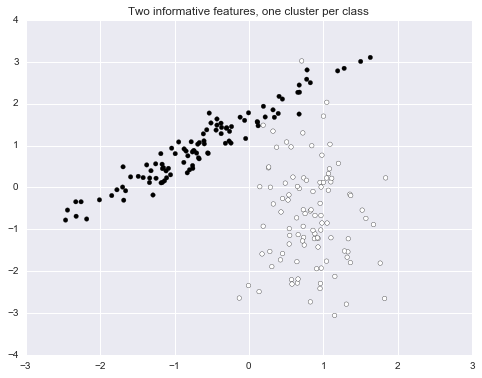

In [145]:
from sklearn.datasets import make_classification

plt.title("Two informative features, one cluster per class", fontsize='small')
X, Y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, class_sep=0.8)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)

Single Layer Perceptron (feed-forward NN, no backpropagation)

Source: https://en.wikipedia.org/wiki/Perceptron

Binary classification where predicted value is

$$   
f(x) =
\begin{cases}
1  & \text{if } w \cdot x + b \gt 0 \\
0 & \text{Otherwise}
\end{cases} 
$$

Later we will use bias("b") as weight_0 where it will always be activated.

The resulting effect is that the bias will [shift](http://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks) the decison boundary whereas other weights will change its shape. [Here's](https://www.willamette.edu/~gorr/classes/cs449/Classification/perceptron.html) an example for a more complicated boundary shapes.

Update the weights "w" , iterate over each input vector j:

$$ w_i(t+1) = w_i(t) +(y_i - f(x_i)) \cdot x_{i,j} $$

Loss function is a simple absolute sum of errors
$$ L = \dfrac{1}{m}\sum_{i=1}^m \bigl|\;f(x_i) - y_i\;\bigr| $$

In [146]:
def f_func(w,x):
    result = w.dot(x.transpose())
    return np.where(result>0,1,0)

def loss_func(f,y):
    return np.average(np.abs(f - y))

stop at 13
[-5.99       -7.07643057  7.62107722]


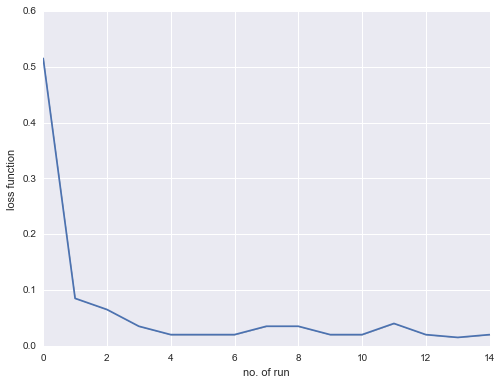

In [147]:
#initialize everything.
w = np.array([0.01 , 0.01, 0.01]) # including bias as weight (w0 in the first column)
Xb = np.insert(X,0,1,axis=1) #add bias input, always activated

#run till convergence
y_pred = f_func(w,Xb)
curr_loss = loss_func(y_pred,Y)
loss = []
loss.append(curr_loss)

for i in range(0,100):
    #iterate over each j input vector
    for j in range(0,Y.shape[0]): 
        y_pred[j] = f_func(w,Xb[j])
        w = w + (Y[j] - y_pred[j])*Xb[j]
    #evaluate aggregate loss function    
    y_pred = f_func(w,Xb)
    curr_loss = loss_func(y_pred,Y)
    loss.append(curr_loss)
    #print 'curr={},prev={},diff={}'.format(curr_loss,loss[-2],loss[-2]-curr_loss)
    if (i>10) and ((loss[-2] - curr_loss) < 10**-5): #stopping criterion
        print 'stop at {}'.format(i)
        break

print w
plt.figure()
plt.xlabel('no. of run')
plt.ylabel('loss function')
sns.tsplot(loss)

[[ 96   0]
 [  4 100]]


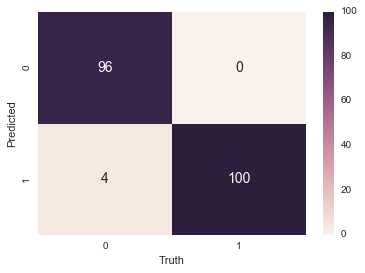

In [148]:
from sklearn.metrics import confusion_matrix
cm_mat = confusion_matrix(Y,y_pred)
print cm_mat.T
df_temp = pd.DataFrame(cm_mat.flatten()[np.newaxis].T,columns = ['values'])
plt.figure(figsize = (6,4),dpi=600)
sns.heatmap(cm_mat.T, cbar=True ,annot=True, fmt=',.0f')
plt.xlabel('Truth')
plt.ylabel('Predicted')

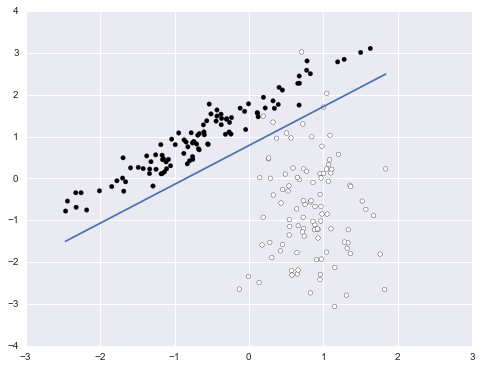

[-1.50217381  2.49252198]


In [149]:
#plot decision boundary

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)

x_line = np.array([np.min(X[:, 0]),np.max(X[:, 0])]) #this is "x0"
y_line = -(w[0] + w[1]*x_line)/w[2] #plot y_line based on where it makes "x1" becomes zero
plt.plot(x_line,y_line)
plt.show()
print y_line

In [55]:
f1 = np.matrix([1,2,3])
y1 = np.matrix([5,5.5,6.0])
print loss_func(f1,y1)
print (4+3.5+3)/3

3.5
3.5


In [86]:
Y.shape[0]

200L

In [95]:
Xb[1]

array([ 1.        ,  0.26428057, -0.80321291])